[['a', 'a', 'b', 'q', 'p', 'o', 'n', 'm'], ['a', 'b', 'c', 'r', 'y', 'x', 'x', 'l'], ['a', 'c', 'c', 's', 'z', 'z', 'x', 'k'], ['a', 'c', 'c', 't', 'u', 'v', 'w', 'j'], ['a', 'b', 'd', 'e', 'f', 'g', 'h', 'i']]
{(0, 0): 'a', (0, 1): 'a', (0, 2): 'b', (0, 3): 'q', (0, 4): 'p', (0, 5): 'o', (0, 6): 'n', (0, 7): 'm', (1, 0): 'a', (1, 1): 'b', (1, 2): 'c', (1, 3): 'r', (1, 4): 'y', (1, 5): 'x', (1, 6): 'x', (1, 7): 'l', (2, 0): 'a', (2, 1): 'c', (2, 2): 'c', (2, 3): 's', (2, 4): 'z', (2, 5): 'z', (2, 6): 'x', (2, 7): 'k', (3, 0): 'a', (3, 1): 'c', (3, 2): 'c', (3, 3): 't', (3, 4): 'u', (3, 5): 'v', (3, 6): 'w', (3, 7): 'j', (4, 0): 'a', (4, 1): 'b', (4, 2): 'd', (4, 3): 'e', (4, 4): 'f', (4, 5): 'g', (4, 6): 'h', (4, 7): 'i'}
True
False


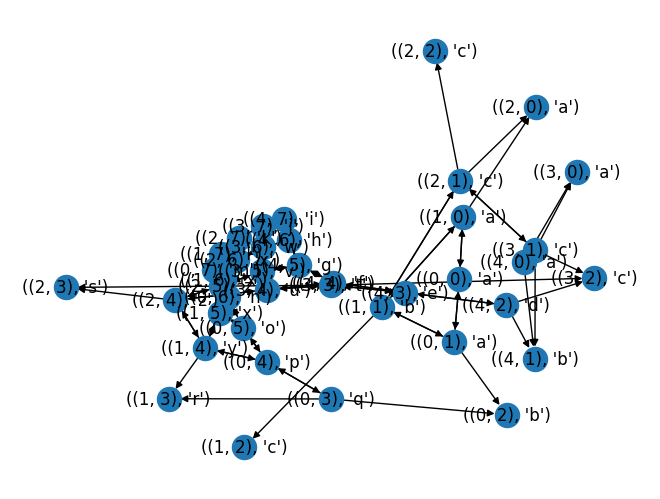

In [112]:
import networkx as nx

input = [line.strip('\n') for line in open('ex.txt').readlines()] # read
input = [row.replace('S', 'a').replace('E', 'z') for row in input] # replace start/end
input = [[char for char in list(row)] for row in input] # str -> list

print(input)

input_a = {}
for x, row in enumerate(input):
    for y, val in enumerate(row):
        input_a[(x, y)] = val

print(input_a)

START = ('a', 0,0)
END = ('z', 4,2)

def find_square(carta, square):
    squares = []
    square = [ord(s) for s in square]
    for x, row in enumerate(carta):
        for y, col in enumerate(row):
            if col in square:
                squares.append((x, y))
    return squares

def build_graph(data):
    G = nx.DiGraph()

    for node in data.items():
        (x, y), val = node
        elev_max = ord(val) + 1

        if x > 4:
            1+1

        # Up
        if (x, y+1) in data:
            u_node = ((x, y+1), data[(x, y+1)])
            if (ord(u_node[1]) <= elev_max):
                G.add_edge(node, u_node)

        # Right
        if (x+1, y) in data:
            r_node = ((x+1, y), data[(x+1, y)])
            if (ord(u_node[1]) <= elev_max):
                G.add_edge(node, r_node)
                
        # Down
        if (x, y-1) in data:
            d_node = ((x, y-1), data[(x, y-1)])
            if (ord(u_node[1]) <= elev_max):
                G.add_edge(node, d_node)

        # Left
        if (x-1, y) in data:
            l_node = ((x-1, y), data[(x-1, y)])
            if (ord(u_node[1]) <= elev_max):
                G.add_edge(node, l_node)
    
    return G

graph = build_graph(input_a)

# S, E = find_square(input, ["S", "E"])
# print(S, E)

nx.draw(graph, with_labels=True)

print(graph.has_node(((0,0),'a')))
print(graph.has_node(((5,2),'z')))

# print(shortest_path)

In [46]:
shortest_path

[(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2)]